# Question 1: Time-series prediction






Prediction can be divided into two categories: regression and classification. In regression, the numerical value of the next days is predicted for a time series. In the classification, the upward or downward trend of the time series is predicted for the next few days.

In this question, you will learn about regression mode and implement a part of:
https://ieeexplore.ieee.org/document/9005997

## Import libraries

In [37]:
!pip install --upgrade mplfinance

In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import datetime
from datetime import datetime
import yfinance as yf
import mplfinance as mpf

import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 1.1- Download data

In [39]:
table = pd.read_html('https://en.wikipedia.com/wiki/List_of_S%26P_500_companies')
table[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [40]:
New_table = table[0]

In [41]:
New_table_2 = New_table[[ datetime.strptime(dt, '%Y-%m-%d') < datetime(2010,1,1) for dt in New_table['Date added'] ] ]
New_table_2

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
...,...,...,...,...,...,...,...,...
495,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002
496,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [42]:
My_Tickers = New_table_2['Symbol'].tolist()

if 'BF.B' in My_Tickers:
    My_Tickers.remove('BF.B')

My_Tickers


['MMM',
 'ABT',
 'ADBE',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AMP',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BA',
 'BKNG',
 'BXP',
 'BSX',
 'BMY',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CAT',
 'CBRE',
 'COR',
 'CNP',
 'CF',
 'CHRW',
 'SCHW',
 'CVX',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'GLW',
 'COST',
 'CTRA',
 'CSX',
 'CMI',
 'CVS',
 'DHR',
 'DRI',
 'DVA',
 'DE',
 'XRAY',
 'DVN',
 'DFS',
 'DOV',
 'DHI',
 'DTE',
 'DUK',
 'EMN',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EA',
 'ELV',
 'LLY',
 'EMR',
 'ETR',
 'EOG',
 'EFX',
 'EQR',
 'EL',
 'ES',
 'EXC',
 'EXPE',
 'EXPD',
 'XOM',
 'FAST',
 'FDX',
 'FIS',
 'FITB',
 'FE',
 'FI',
 'FMC',
 'F',
 'BEN',
 'GEN',
 'GD',
 'GE',
 'GIS',
 'G

In [43]:
Raw_price_for_my_tickers = yf.download(tickers=My_Tickers, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  290 of 290 completed


In [44]:
Raw_price_for_my_tickers

AMP                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   39.099998   39.970001   38.919998   39.880001   29.251768   
2010-01-05   39.770000   40.810001   39.730000   40.810001   29.933910   
2010-01-06   41.369999   41.549999   40.860001   41.380001   30.352007   
2010-01-07   41.299999   41.950001   41.099998   41.689999   30.579401   
2010-01-08   41.380001   41.900002   41.340000   41.840000   30.689426   
...                ...         ...         ...         ...         ...   
2023-12-07  351.279999  353.010010  350.369995  352.730011  352.730011   
2023-12-08  352.320007  358.260010  352.320007  357.579987  357.579987   
2023-12-11  359.100006  366.769989  358.890015  365.429993  365.429993   
2023-12-12  366.119995  370.380005  365.440002  370.230011  370.230011   
2023-12-13  371.000000  373.660004  368.660004  371.779999  371.779999   

                           SYY                                   ...  \
             Volume       Open       High        Low      Close  ...   
Date                                                             ...   
2010-01-04  2238700  28.200001  28.400000  28.000000  28.100000  ...   
2010-01-05  2782200  28.010000  28.129999  27.820000  27.980000  ...   
2010-01-06  3575200  27.889999  28.150000  27.760000  28.059999  ...   
2010-01-07  2992900  28.010000  28.100000  27.750000  28.090000  ...   
2010-01-08  1463600  28.080000  28.080000  27.780001  27.910000  ...   
...             ...        ...        ...        ...        ...  ...   
2023-12-07   449100  73.739998  74.389999  73.360001  74.180000  ...   
2023-12-08   418100  74.080002  74.230003  73.610001  73.830002  ...   
2023-12-11   592800  74.169998  74.349998  73.610001  73.930000  ...   
2023-12-12   511500  73.980003  74.150002  73.360001  73.610001  ...   
2023-12-13   863400  73.720001  75.500000  73.349998  75.339996  ...   

                   AVB                                          ROP  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2010-01-04   81.010002   81.199997   51.997433  1483400   53.020000   
2010-01-05   79.760002   80.589996   51.606827  1341000   52.590000   
2010-01-06   79.480003   79.830002   51.120159  1359000   51.660000   
2010-01-07   78.839996   79.989998   51.222599  1755800   51.389999   
2010-01-08   77.940002   79.389999   50.838394  1199900   52.049999   
...                ...         ...         ...      ...         ...   
2023-12-07  173.789993  175.380005  175.380005   679000  536.489990   
2023-12-08  173.949997  175.750000  175.750000   588600  533.450012   
2023-12-11  173.660004  175.410004  175.410004   691800  540.000000   
2023-12-12  174.229996  174.830002  174.830002   842100  542.099976   
2023-12-13  174.699997  183.979996  183.979996   954600  544.869995   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2010-01-04   53.240002   52.380001   52.540001   48.378349   927900  
2010-01-05   52.590000   51.619999   51.869999   47.761429  1102500  
2010-01-06   52.299999   51.430000   52.270000   48.218048  1099800  
2010-01-07   52.240002   51.110001   52.070000   48.033558  1394200  
2010-01-08   52.509998   51.700001   52.439999   48.374874   720400  
...                ...         ...         ...         ...      ...  
2023-12-07  536.489990  532.039978  534.799988  534.799988   361400  
2023-12-08  537.580017  531.710022  536.599976  536.599976   394000  
2023-12-11  544.440002  536.950012  540.210022  540.210022   593500  
2023-12-12  545.010010  542.020020  543.460022  543.460022   693500  
2023-12-13  551.909973  544.530029  550.770020  550.770020   689400 

In [45]:
Raw_price_for_my_tickers.head()

AMP                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2010-01-04  39.099998  39.970001  38.919998  39.880001  29.251768  2238700   
2010-01-05  39.770000  40.810001  39.730000  40.810001  29.933910  2782200   
2010-01-06  41.369999  41.549999  40.860001  41.380001  30.352007  3575200   
2010-01-07  41.299999  41.950001  41.099998  41.689999  30.579401  2992900   
2010-01-08  41.380001  41.900002  41.340000  41.840000  30.689426  1463600   

                  SYY                                   ...        AVB  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2010-01-04  28.200001  28.400000  28.000000  28.100000  ...  81.010002   
2010-01-05  28.010000  28.129999  27.820000  27.980000  ...  79.760002   
2010-01-06  27.889999  28.150000  27.760000  28.059999  ...  79.480003   
2010-01-07  28.010000  28.100000  27.750000  28.090000  ...  78.839996   
2010-01-08  28.080000  28.080000  27.780001  27.910000  ...  77.940002   

                                                 ROP                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2010-01-04  81.199997  51.997433  1483400  53.020000  53.240002  52.380001   
2010-01-05  80.589996  51.606827  1341000  52.590000  52.590000  51.619999   
2010-01-06  79.830002  51.120159  1359000  51.660000  52.299999  51.430000   
2010-01-07  79.989998  51.222599  1755800  51.389999  52.240002  51.110001   
2010-01-08  79.389999  50.838394  1199900  52.049999  52.509998  51.700001   

                                           
                Close  Adj Close   Volume  
Date                                       
2010-01-04  52.540001  48.378349   927900  
2010-01-05  51.869999  47.761429  1102500  
2010-01-06  52.270000  48.218048  1099800  
2010-01-07  52.070000  48.033558  1394200  
2010-01-08  52.439999  48.374874   720400  

[5 rows x 1740 columns]

In [46]:
Raw_price_for_my_tickers.columns

MultiIndex([('AMP',      'Open'),
            ('AMP',      'High'),
            ('AMP',       'Low'),
            ('AMP',     'Close'),
            ('AMP', 'Adj Close'),
            ('AMP',    'Volume'),
            ('SYY',      'Open'),
            ('SYY',      'High'),
            ('SYY',       'Low'),
            ('SYY',     'Close'),
            ...
            ('AVB',       'Low'),
            ('AVB',     'Close'),
            ('AVB', 'Adj Close'),
            ('AVB',    'Volume'),
            ('ROP',      'Open'),
            ('ROP',      'High'),
            ('ROP',       'Low'),
            ('ROP',     'Close'),
            ('ROP', 'Adj Close'),
            ('ROP',    'Volume')],
           length=1740)

## 2-1. Exploring time series data and familiarizing with famous theories and libraries

#### Question 1: If the null data was at the beginning, what methods can be used to solve this problem?

If we had null data at the beginning of a time series and we want to handle it, there are several methods we can consider:

* Forward Fill (Pad): This method involves filling missing values with the last known value. This approach assumes that the future values will be similar to the most recent past values.
` Raw_price_for_my_tickers.ffill(inplace=True) `

* Backward Fill (Bfill): This method involves filling missing values with the next available value. Similar to forward fill, it assumes that the past values will be similar to the most recent future values.
`Raw_price_for_my_tickers.bfill(inplace=True)`

* Interpolation: Interpolation is a method where missing values are estimated based on the values around them. There are different interpolation methods available, such as linear interpolation, polynomial interpolation, etc.
`Raw_price_for_my_tickers.interpolate(method='linear', inplace=True)`

* Replace with a Constant: You can replace with cons values.
`Raw_price_for_my_tickers.fillna(value=0, inplace=True)`

#### Question 2: If we have null value data in the middle or at the end of the time series, how do we solve it?


If we have null values in the middle or at the end of a time series, we can use similar methods to handle the missing data. Here are some common approaches:

There are several methods to handle missing values in time series data, including:

* Interpolation: This method replaces missing values with estimates based on the values of surrounding time points. Common interpolation methods include linear interpolation and spline interpolation.

* Extrapolation: This method extends the time series data beyond the existing data points by using mathematical models to estimate missing values.

* Forward-fill and backward-fill: In forward-fill, missing values are filled in with the next available value. In backward-fill, missing values are filled in with the previous available value.

* Last Observation Carried Forward (LOCF): This method replaces missing values with the last observed value.

* Multiple imputation: This method uses statistical methods to generate multiple estimates for missing values and then combines the results to produce a single estimate.

In [47]:
print(Raw_price_for_my_tickers.isna().sum())


AMP  Open         0
     High         0
     Low          0
     Close        0
     Adj Close    0
                 ..
ROP  High         0
     Low          0
     Close        0
     Adj Close    0
     Volume       0
Length: 1740, dtype: int64


Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [48]:
Raw_price_for_my_tickers.fillna(method='ffill', inplace=True)
Raw_price_for_my_tickers = Raw_price_for_my_tickers.fillna(method='ffill')
print(Raw_price_for_my_tickers.isna().sum())


AMP  Open         0
     High         0
     Low          0
     Close        0
     Adj Close    0
                 ..
ROP  High         0
     Low          0
     Close        0
     Adj Close    0
     Volume       0
Length: 1740, dtype: int64


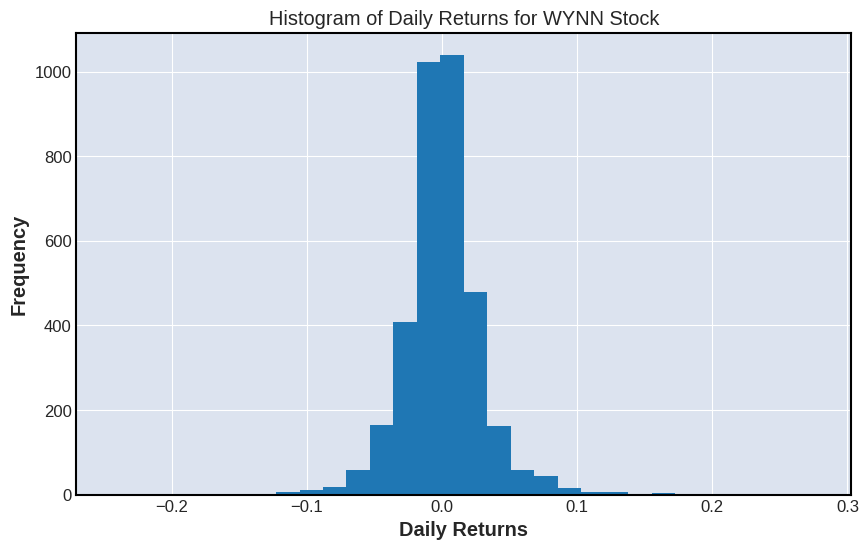

In [49]:
plt.figure(figsize=(10, 6))
( Raw_price_for_my_tickers['WYNN']['Close'].pct_change()).hist(bins=30)
plt.title('Histogram of Daily Returns for WYNN Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

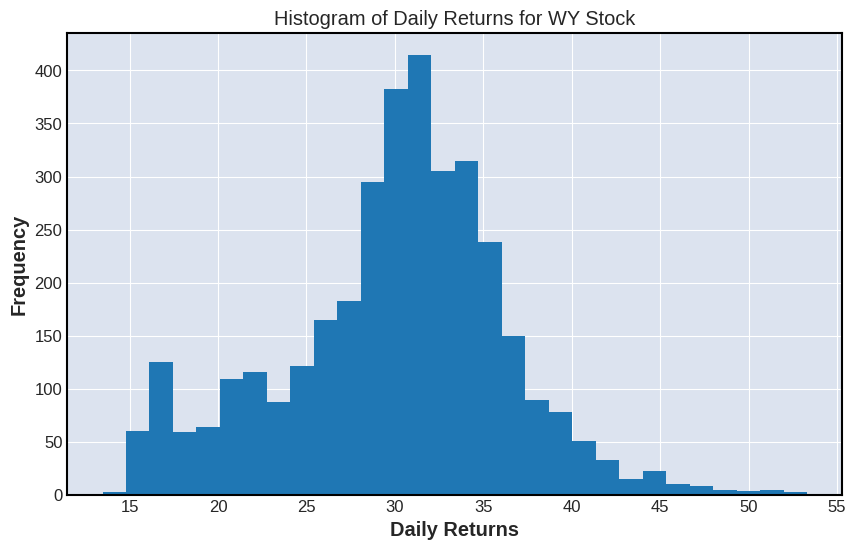

In [50]:
plt.figure(figsize=(10, 6))
(Raw_price_for_my_tickers['WY']['Close']).hist(bins=30)
plt.title('Histogram of Daily Returns for WY Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

According to the Random walks theory, prediction of next days stock closing price is not dependent to anything and it can goes up or down. Based on out plots we can see that if we relay on the previos day for out prediction and getting the trend downward or upward from the charts trend we can get high accuraccy because of the semi-normal values.



So in the marketing data if we look too backward we might get incorrect data and it is better to look a few days before what day we want to predict.

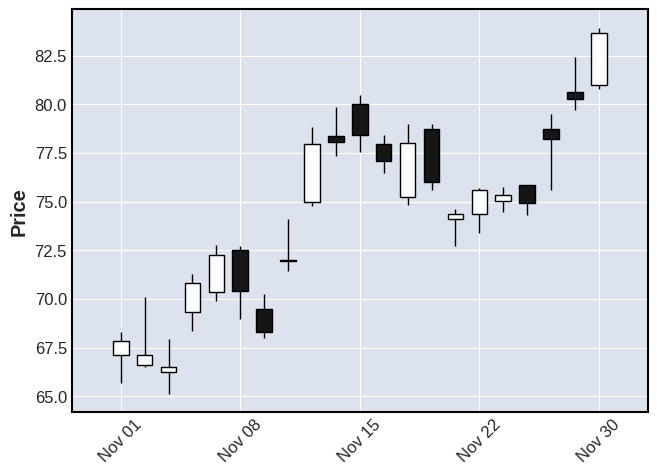

In [51]:
wynn_data = Raw_price_for_my_tickers['WYNN']
wynn_data_november = wynn_data['2022-11-01':'2022-11-30']

mpf.plot(wynn_data_november, type='candle')


## 3-1. TimeSeriesSplit

here we only keep:
selected_tickers = ['AMZN', 'MSFT', 'AAPL', 'META', 'GOOGL']


In [52]:
tickers_to_download = ['GOOGL']
additional_data_google = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['META']
additional_data_META = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AMZN']
additional_data_AMZN = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['MSFT']
additional_data_MSFT = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AAPL']
additional_data_AAPL = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [53]:
additional_data_google = additional_data_google.interpolate(method='linear')
additional_data_META = additional_data_META.interpolate(method='linear')
additional_data_AMZN = additional_data_META.interpolate(method='linear')
additional_data_MSFT = additional_data_META.interpolate(method='linear')
additional_data_AAPL = additional_data_META.interpolate(method='linear')


In [54]:
additional_data_google


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2023-12-07,135.039993,138.559998,134.699997,136.929993,136.929993,56767100
2023-12-08,134.199997,136.399994,134.029999,134.990005,134.990005,32233900
2023-12-11,132.380005,133.339996,131.360001,133.289993,133.289993,31138000


In [55]:
additional_data_META

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-12-07,317.769989,328.239990,317.769989,326.589996,326.589996,15905100
2023-12-08,323.089996,333.170013,323.000000,332.750000,332.750000,14077500
2023-12-11,329.399994,329.890015,320.000000,325.279999,325.279999,25802500


In [56]:
combined_data = pd.concat([additional_data_google, additional_data_META], axis=1, keys=['GOOGL', 'META'])
combined_data

GOOGL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   15.689439   15.753504   15.621622   15.684434   15.684434   
2010-01-05   15.695195   15.711712   15.554054   15.615365   15.615365   
2010-01-06   15.662162   15.662162   15.174174   15.221722   15.221722   
2010-01-07   15.250250   15.265265   14.831081   14.867367   14.867367   
2010-01-08   14.814815   15.096346   14.742492   15.065566   15.065566   
...                ...         ...         ...         ...         ...   
2023-12-07  135.039993  138.559998  134.699997  136.929993  136.929993   
2023-12-08  134.199997  136.399994  134.029999  134.990005  134.990005   
2023-12-11  132.380005  133.339996  131.360001  133.289993  133.289993   
2023-12-12  131.809998  133.000000  131.259995  132.520004  132.520004   
2023-12-13  133.380005  133.500000  131.570007  132.570007  132.570007   

                             META                                      \
               Volume        Open        High         Low       Close   
Date                                                                    
2010-01-04   78169752         NaN         NaN         NaN         NaN   
2010-01-05  120067812         NaN         NaN         NaN         NaN   
2010-01-06  158988852         NaN         NaN         NaN         NaN   
2010-01-07  256315428         NaN         NaN         NaN         NaN   
2010-01-08  188783028         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-12-07   56767100  317.769989  328.239990  317.769989  326.589996   
2023-12-08   32233900  323.089996  333.170013  323.000000  332.750000   
2023-12-11   31138000  329.399994  329.890015  320.000000  325.279999   
2023-12-12   29032800  324.600006  334.470001  324.559998  334.220001   
2023-12-13   29906600  333.929993  338.369995  332.640015  334.739990   

                                    
             Adj Close      Volume  
Date                                
2010-01-04         NaN         NaN  
2010-01-05         NaN         NaN  
2010-01-06         NaN         NaN  
2010-01-07         NaN         NaN  
2010-01-08         NaN         NaN  
...                ...         ...  
2023-12-07  326.589996  15905100.0  
2023-12-08  332.750000  14077500.0  
2023-12-11  325.279999  25802500.0  
2023-12-12  334.220001  18485500.0  
2023-12-13  334.739990  16289100.0  

[3511 rows x 12 columns]

In [57]:
selected_tickers = ['AMZN', 'MSFT', 'AAPL','META','GOOGL']
data_full_scaled_sp500 = yf.download(selected_tickers, start="2010-01-04", interval="1d", group_by="ticker")
data_full_scaled_sp500_cleaned = data_full_scaled_sp500.dropna()
data_full_scaled_sp500_cleaned

[*********************100%%**********************]  5 of 5 completed


AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2012-05-18   10.970500   10.981500   10.640500   10.692500   10.692500   
2012-05-21   10.701500   10.999000   10.641000   10.905500   10.905500   
2012-05-22   10.915500   10.943500   10.698000   10.766500   10.766500   
2012-05-23   10.735500   10.877500   10.559000   10.864000   10.864000   
2012-05-24   10.849000   10.883000   10.635000   10.762000   10.762000   
...                ...         ...         ...         ...         ...   
2023-12-07  146.149994  147.919998  145.339996  146.880005  146.880005   
2023-12-08  145.479996  147.839996  145.399994  147.419998  147.419998   
2023-12-11  145.660004  146.190002  143.639999  145.889999  145.889999   
2023-12-12  145.520004  147.500000  145.300003  147.479996  147.479996   
2023-12-13  148.119995  149.460007  146.820007  148.839996  148.839996   

                            GOOGL                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2012-05-18  104634000   15.643143   15.826326   14.932432   15.025025  ...   
2012-05-21   71596000   15.027778   15.407658   15.015015   15.368118  ...   
2012-05-22   74662000   15.351351   15.360611   14.914915   15.035035  ...   
2012-05-23   84876000   15.056306   15.255255   14.942943   15.251752  ...   
2012-05-24   62822000   15.244244   15.313313   14.986737   15.106607  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-07   52352800  135.039993  138.559998  134.699997  136.929993  ...   
2023-12-08   41858000  134.199997  136.399994  134.029999  134.990005  ...   
2023-12-11   50907300  132.380005  133.339996  131.360001  133.289993  ...   
2023-12-12   44944300  131.809998  133.000000  131.259995  132.520004  ...   
2023-12-13   52394000  133.380005  133.500000  131.570007  132.570007  ...   

                  MSFT                                          META  \
                   Low       Close   Adj Close    Volume        Open   
Date                                                                   
2012-05-18   29.170000   29.270000   23.571972  56205300   42.049999   
2012-05-21   29.059999   29.750000   23.958523  38787900   36.529999   
2012-05-22   29.500000   29.760000   23.966574  39504900   32.610001   
2012-05-23   28.639999   29.110001   23.443115  65171000   31.370001   
2012-05-24   28.760000   29.070000   23.410900  52575000   32.950001   
...                ...         ...         ...       ...         ...   
2023-12-07  366.320007  370.950012  370.950012  23118900  317.769989   
2023-12-08  368.230011  374.230011  374.230011  20144800  323.089996   
2023-12-11  366.100006  371.299988  371.299988  27708800  329.399994   
2023-12-12  370.459991  374.380005  374.380005  24838300  324.600006   
2023-12-13  370.769989  374.369995  374.369995  30681800  333.929993   

                                                                         
                  High         Low       Close   Adj Close       Volume  
Date                                                                     
2012-05-18   45.000000   38.000000   38.230000   38.230000  573576400.0  
2012-05-21   36.660000   33.000000   34.029999   34.029999  168192700.0  
2012-05-22   33.590000   30.940001   31.000000   31.000000  101786600.0  
2012-05-23   32.500000   31.360001   32.000000   32.000000   73600000.0  
2012-05-24   33.209999   31.770000   33.029999   33.029999   50237200.0  
...                ...         ...         ...         ...          ...  
2023-12-07  328.239990  317.769989  326.589996  326.589996   15905100.0  
2023-12-08  333.170013  323.000000  332.750000  332.750000   14077500.0  
2023-12-11  329.890015  320.000000  325.279999  325.279999   2580

Here in time series cross validation is not possible as before:

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

The method that can be used for cross-validating the time-series model is cross-validation on a rolling basis. Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.

The idea of cross-validation should be more straightforward to grasp when we look at an example. Imagine that we have only 5 observations in our cross-validation set and we want to perform 4-fold cross-validation.

Here is the dataset: [1, 2, 3, 4, 5]

There is only one way to generate such pairs from my dataset. As a result, I get 4 pairs of training/test sets:

- Training: [1] Test: [2]

- Training: [1, 2] Test: [3]

- Training: [1, 2, 3] Test: [4]

- Training: [1, 2, 3, 4] Test: [5]

Compute the average of the accuracies of the 4 test fold.

In [58]:
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits = cv_n_splits )

## 4-1. Preparing input and output model

**The input of the model** is the data of previous days. This data can only include the price close of the last few days. Or it can include open, high, low, and volume data. To reduce dimensionality, usually only price close is used to train the model.

**The output of the price model** is a specific day in the future (Horizon). For this exercise, you will only predict the next day's data

In [106]:

window_size = 10
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits=cv_n_splits)

x_tickers_sp500 = []
y_tickers_sp500 = []

x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Loop through each ticker
for ticker_name in selected_tickers:
    X_time_series = []
    Y_time_series = []

    for i in range(window_size, len(data_full_scaled_sp500_cleaned[ticker_name])):
      X_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'][i-window_size:i])
      Y_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'])

    X_time_series = np.array(X_time_series)
    Y_time_series = np.array(Y_time_series)

    x_tickers_sp500.append( X_time_series[(31 - window_size):])
    y_tickers_sp500.append( X_time_series[(31 - window_size):])




In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_tickers_sp500_normalized = [scaler.fit_transform(array) for array in x_tickers_sp500]
y_tickers_sp500_normalized = [scaler.fit_transform(array) for array in y_tickers_sp500]
print("Length of y_tickers_sp500[0]:", len(y_tickers_sp500_normalized[0]))
print("Length of x_tickers_sp500[0]:", len(x_tickers_sp500_normalized[0]))


Length of y_tickers_sp500[0]: 2881
Length of x_tickers_sp500[0]: 2881


In [114]:
print(len(x_tickers_sp500[0]))
print(len(y_tickers_sp500[0]))


2881
2881
